<a href="https://www.kaggle.com/code/vtrackstar/nfl-team-stats-data-analytics-project?scriptVersionId=195209226" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Prepare and Process

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

stats = pd.read_csv('/kaggle/input/nfl-team-data-2003-2023/team_stats_2003_2023.csv')
stats.columns

/kaggle/input/nfl-team-data-2003-2023/team_stats_2003_2023.csv


Index(['year', 'team', 'wins', 'losses', 'win_loss_perc', 'points',
       'points_opp', 'points_diff', 'mov', 'g', 'total_yards', 'plays_offense',
       'yds_per_play_offense', 'turnovers', 'fumbles_lost', 'first_down',
       'pass_cmp', 'pass_att', 'pass_yds', 'pass_td', 'pass_int',
       'pass_net_yds_per_att', 'pass_fd', 'rush_att', 'rush_yds', 'rush_td',
       'rush_yds_per_att', 'rush_fd', 'penalties', 'penalties_yds', 'pen_fd',
       'score_pct', 'turnover_pct', 'exp_pts_tot', 'ties'],
      dtype='object')

In [2]:
# Over 300 missing values from 'margin of victory' and 'ties' columns observed from 'column' view under Input tab
# Columns appear to be mutually exclusive, when value is present in one column, there isnt one in the other

# Fill missing values in 'ties' to be 0
stats['ties'] = stats['ties'].fillna(0)

#Calculate 'margin of victory' by dividing 'point differential' from 'games'
calc_mov = (stats['points_diff'] / stats['g']).round(1)

# Fill in missing values in 'mov' column
stats['mov'] = stats['mov'].fillna(calc_mov)

stats.head()

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,...,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,...,9,3.4,91,111,998,26,27.9,11.3,-136.51,0.0
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,...,14,3.7,99,103,913,22,28.1,17.2,-177.92,0.0
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,...,13,3.9,96,106,891,22,21.9,17.6,-230.07,0.0
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,...,8,4.0,78,69,550,15,32.4,11.8,-107.89,0.0
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,...,18,4.8,115,126,970,23,31.8,16.6,-220.50,0.0


In [3]:
# Check for missing values in the entire DataFrame
missing_values_summary = stats.isna().sum()

print(missing_values_summary)

year                    0
team                    0
wins                    0
losses                  0
win_loss_perc           0
points                  0
points_opp              0
points_diff             0
mov                     0
g                       0
total_yards             0
plays_offense           0
yds_per_play_offense    0
turnovers               0
fumbles_lost            0
first_down              0
pass_cmp                0
pass_att                0
pass_yds                0
pass_td                 0
pass_int                0
pass_net_yds_per_att    0
pass_fd                 0
rush_att                0
rush_yds                0
rush_td                 0
rush_yds_per_att        0
rush_fd                 0
penalties               0
penalties_yds           0
pen_fd                  0
score_pct               0
turnover_pct            0
exp_pts_tot             0
ties                    0
dtype: int64


In [4]:
# Create copy of cleaned data
stats_cleaned = stats.copy()

# Add 'Division' column for cleaner visualizations

# Function to assign divisions based on team names
def assign_division(team):
    if team in ["New England Patriots", "Miami Dolphins", "Buffalo Bills", "New York Jets"]:
        return "AFC East"
    elif team in ["Denver Broncos", "Las Vegas Raiders", "Kansas City Chiefs", "Los Angeles Chargers", "Oakland Raiders", "San Diego Chargers"]:
        return "AFC West"
    elif team in ["Baltimore Ravens", "Cincinnati Bengals", "Pittsburgh Steelers", "Cleveland Browns"]:
        return "AFC North"
    elif team in ["Houston Texans", "Indianapolis Colts", "Jacksonville Jaguars", "Tennessee Titans"]:
        return "AFC South"
    elif team in ["Chicago Bears", "Detroit Lions", "Green Bay Packers", "Minnesota Vikings"]:
        return "NFC North"
    elif team in ["Arizona Cardinals", "Los Angeles Rams", "San Francisco 49ers", "Seattle Seahawks", "St. Louis Rams"]:
        return "NFC West"
    elif team in ["Atlanta Falcons", "Carolina Panthers", "New Orleans Saints", "Tampa Bay Buccaneers"]:
        return "NFC South"    
    else:
        return "NFC East"

stats_cleaned["division"] = stats_cleaned["team"].apply(lambda team: assign_division(team))

stats_cleaned.name = "Cleaned NFL Data"
stats_cleaned.to_csv('cleaned_team_stats_03_23_nfldata.csv', index=False)

# Check for accuracy
stats_cleaned.head()

value_counts = stats_cleaned['division'].value_counts()

# Print the result
print(value_counts)

division
AFC East     84
AFC North    84
AFC South    84
AFC West     84
NFC East     84
NFC North    84
NFC South    84
NFC West     84
Name: count, dtype: int64


In [5]:
missing_values_summary1 = stats_cleaned.isna().sum()

print(missing_values_summary1)

# Create a copy to map team names who changed throughout dataset for better visualization
stats_name = stats_cleaned.copy()

# Create mapping
team_name_mapping = {
    "San Diego Chargers": "Los Angeles Chargers",
    "St. Louis Rams": "Los Angeles Rams",
    "Washington Football Team": "Washington Commanders",
    "Washington Redskins": "Washington Commanders",
    "Oakland Raiders": "Las Vegas Raiders"
}

# Apply the team name mapping
stats_name['team'] = stats_name['team'].replace(team_name_mapping)


year                    0
team                    0
wins                    0
losses                  0
win_loss_perc           0
points                  0
points_opp              0
points_diff             0
mov                     0
g                       0
total_yards             0
plays_offense           0
yds_per_play_offense    0
turnovers               0
fumbles_lost            0
first_down              0
pass_cmp                0
pass_att                0
pass_yds                0
pass_td                 0
pass_int                0
pass_net_yds_per_att    0
pass_fd                 0
rush_att                0
rush_yds                0
rush_td                 0
rush_yds_per_att        0
rush_fd                 0
penalties               0
penalties_yds           0
pen_fd                  0
score_pct               0
turnover_pct            0
exp_pts_tot             0
ties                    0
division                0
dtype: int64


## Analyze

                                     wins  losses  win_loss_perc  points  \
team                  year division                                        
Arizona Cardinals     2003 NFC West     4      12          0.250     225   
                      2004 NFC West     6      10          0.375     284   
                      2005 NFC West     5      11          0.313     311   
                      2006 NFC West     5      11          0.313     314   
                      2007 NFC West     8       8          0.500     404   
...                                   ...     ...            ...     ...   
Washington Commanders 2019 NFC East     3      13          0.188     266   
                      2020 NFC East     7       9          0.438     335   
                      2021 NFC East     7      10          0.412     335   
                      2022 NFC East     8       8          0.500     321   
                      2023 NFC East     4      13          0.235     329   

           

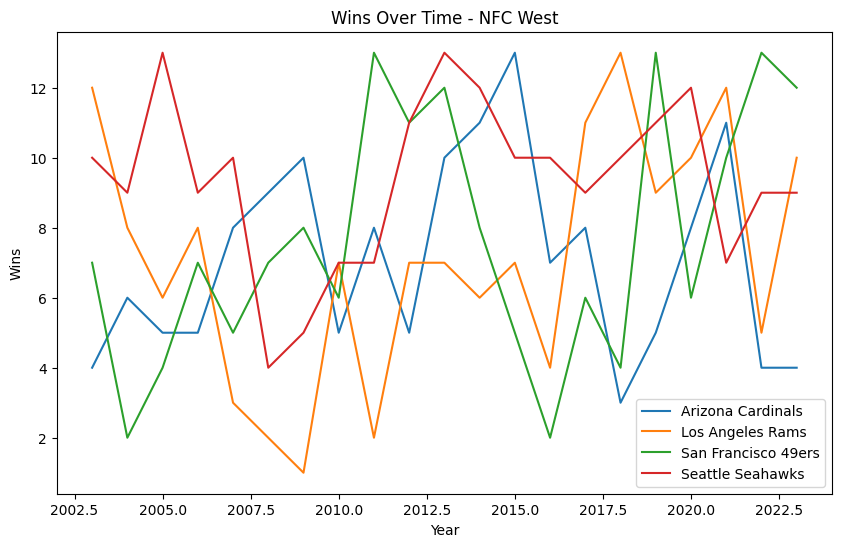

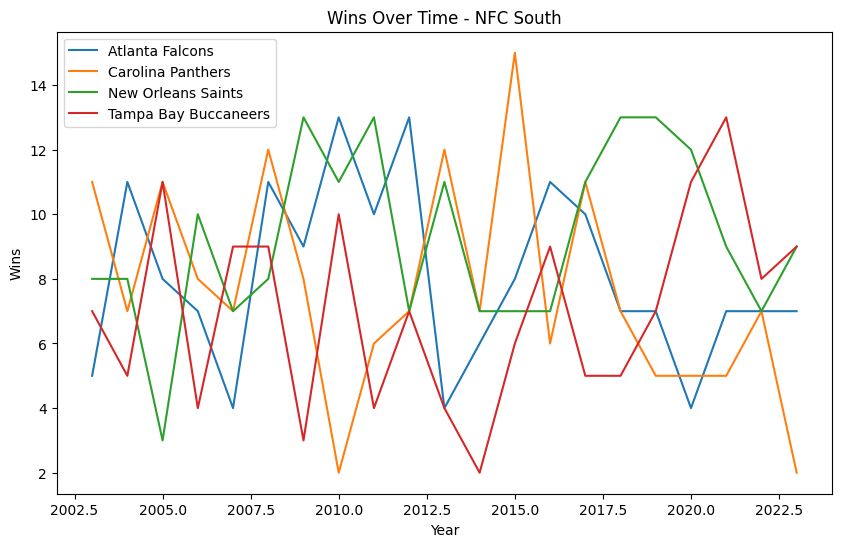

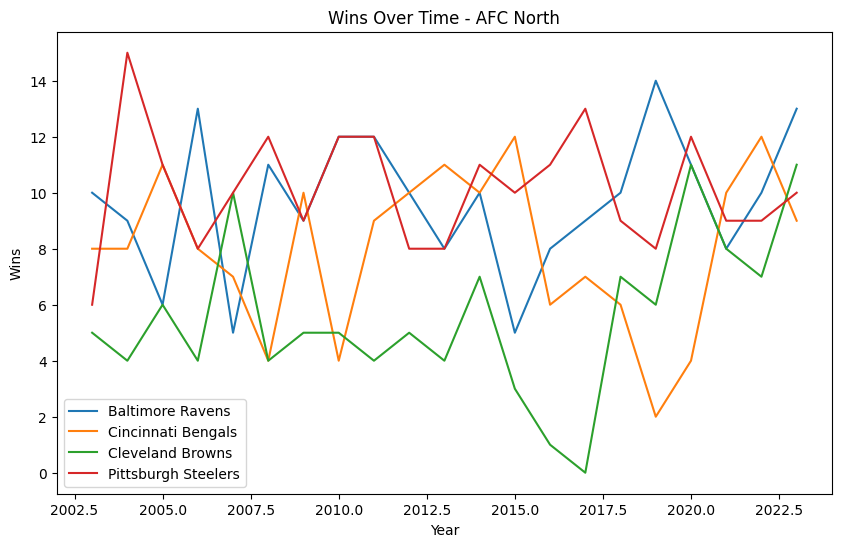

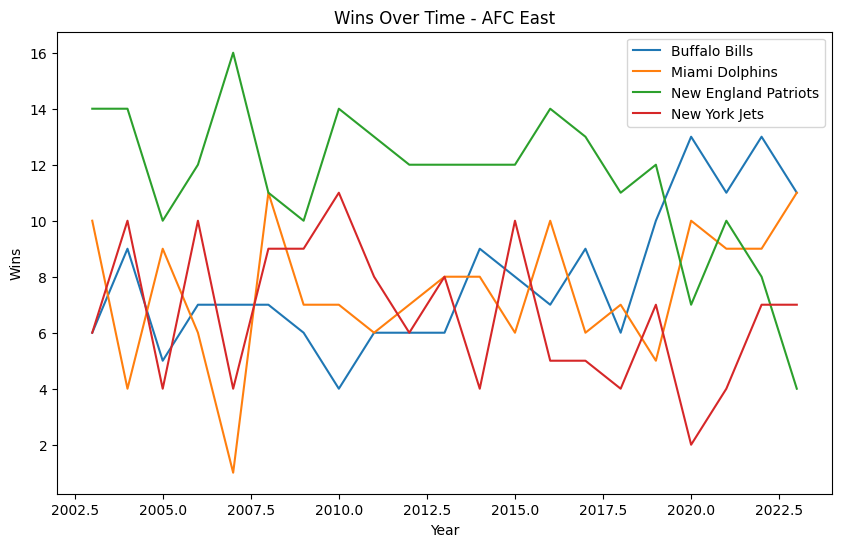

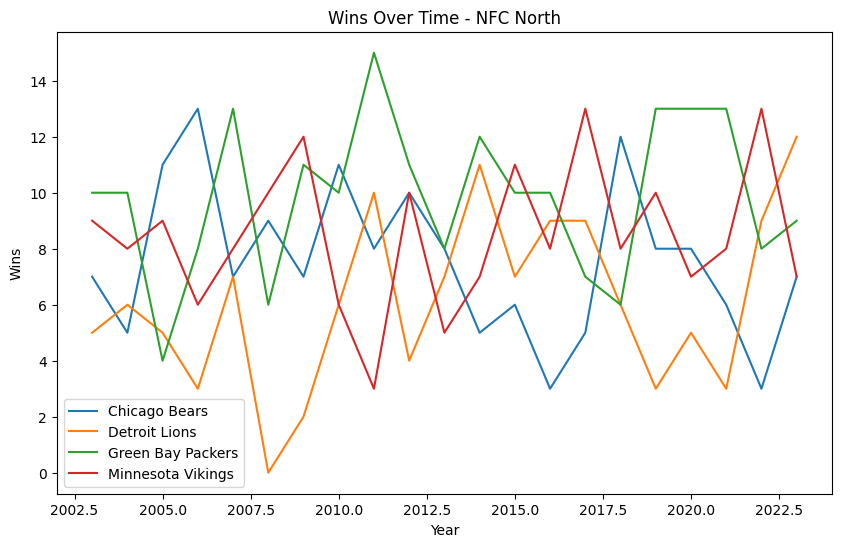

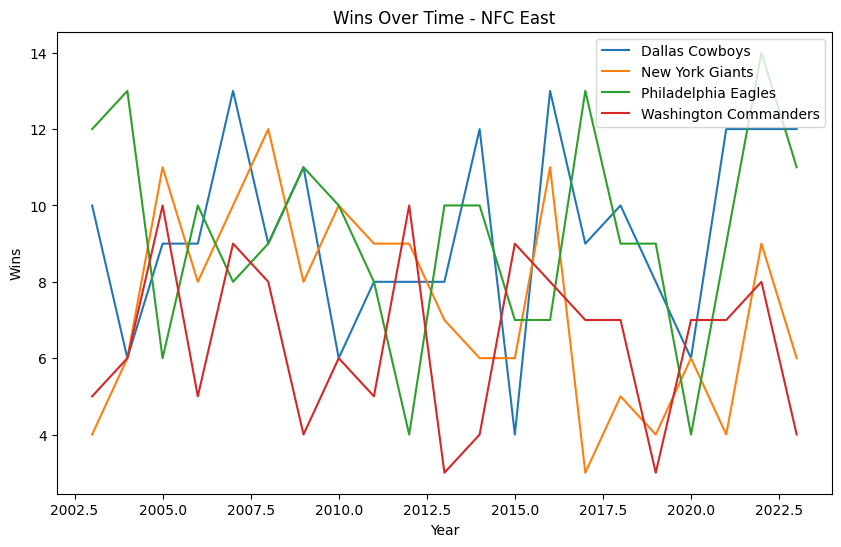

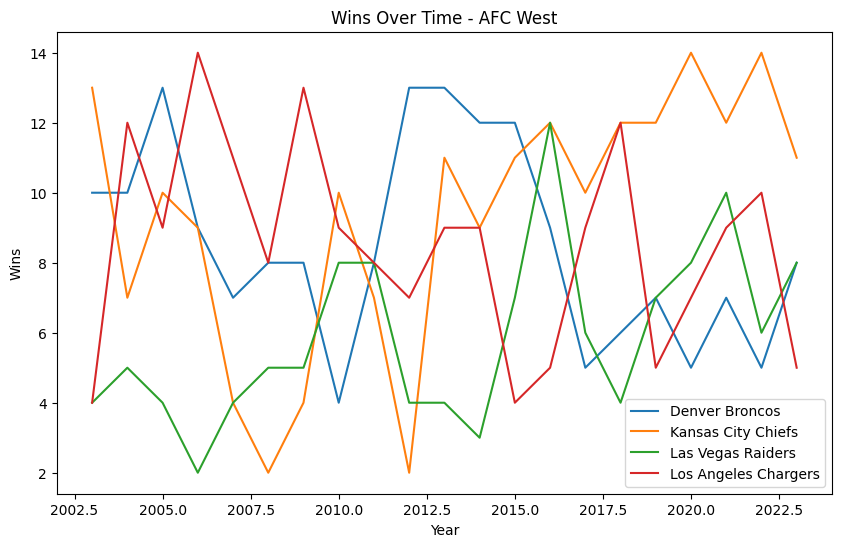

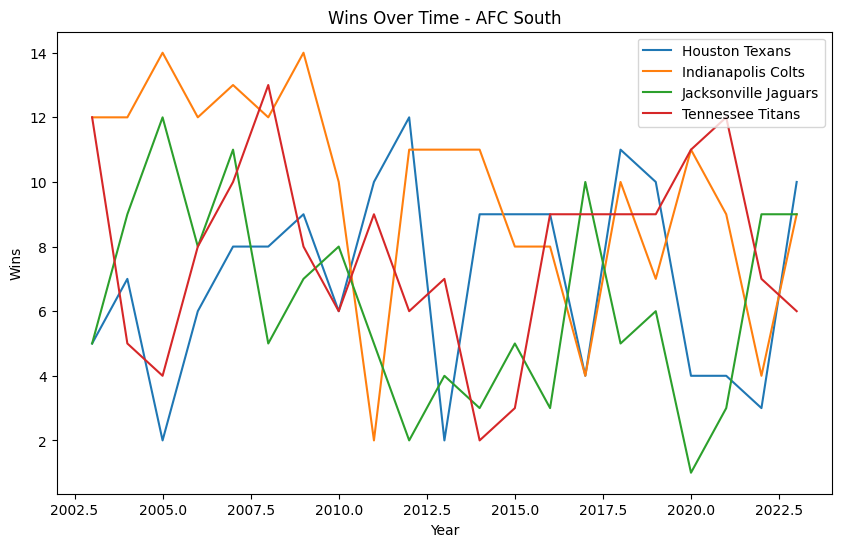

In [6]:
# Team Performance Analysis
# Aggregate data by team and year
agg_stats = stats_name.groupby(["team", "year", "division"]).sum()
print(agg_stats)

# Get unique divisions
divisions = agg_stats.index.get_level_values("division").unique()

# Plotting for each division
for division in divisions:
    # Filter data for the current division
    division_data = agg_stats.xs(division, level="division")
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    for team, team_data in division_data.groupby("team"):
        plt.plot(team_data.index.get_level_values("year"), team_data["wins"], label=team)
    
    plt.title(f"Wins Over Time - {division}")
    plt.xlabel("Year")
    plt.ylabel("Wins")
    plt.legend()
    plt.show()

Correlation Matrix: Total Yards vs Points vs Wins
             total_yards    points      wins
total_yards     1.000000  0.837513  0.548353
points          0.837513  1.000000  0.753723
wins            0.548353  0.753723  1.000000


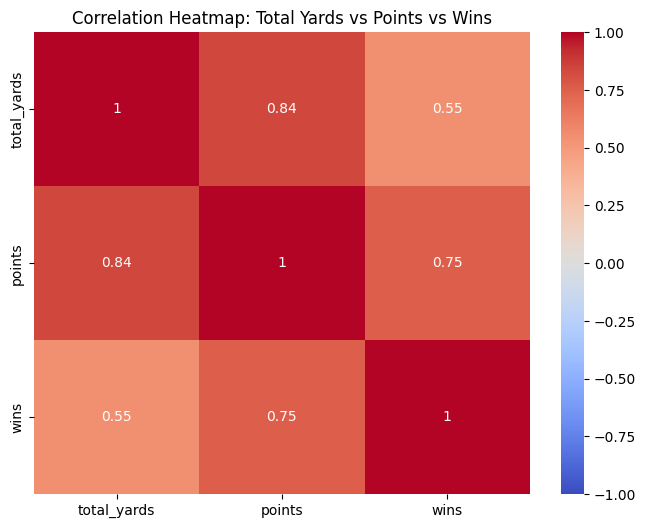

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


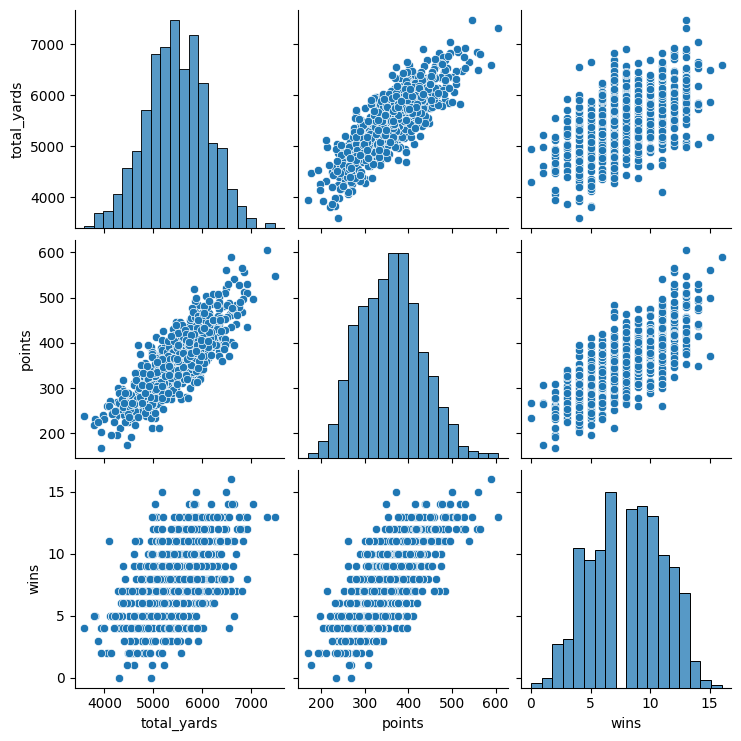

In [7]:
# Perform correlation analysis
correlation_matrix = stats_name[['total_yards', 'points', 'wins']].corr()

# Print correlation matrix
print("Correlation Matrix: Total Yards vs Points vs Wins")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap and scatterplot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Total Yards vs Points vs Wins')
plt.show()

# Scatter plot
sns.pairplot(stats_name[['total_yards', 'points', 'wins']])
plt.show()

In [8]:
# Effect of Key Statistics on Game Success
# Regression Analysis Machine Learning Model
y = stats_name.wins

# Create the list of features: 'points', 'points_opp', 'points_diff', 'mov', 
          #  'total_yards', 'plays_offense', 'yds_per_play_offense', 'turnovers', 
          #  'fumbles_lost', 'first_down', 'pass_cmp', 'pass_att', 'pass_yds', 
          #  'pass_td', 'pass_int', 'pass_net_yds_per_att', 
          #  'rush_att', 'rush_yds', 'rush_td', 'rush_yds_per_att', 
          #  'penalties', 'penalties_yds', 'turnover_pct'
feat_names = ['points', 'points_opp', 'points_diff', 'mov', 
            'total_yards', 'plays_offense', 'yds_per_play_offense', 'turnovers', 
            'fumbles_lost', 'first_down', 'pass_cmp', 'pass_att', 'pass_yds', 
            'pass_td', 'pass_int', 'pass_net_yds_per_att', 
            'rush_att', 'rush_yds', 'rush_td', 'rush_yds_per_att', 
            'penalties', 'penalties_yds', 'turnover_pct']
X = stats_name[feat_names]

X.head()

,points,points_opp,points_diff,mov,total_yards,plays_offense,yds_per_play_offense,turnovers,fumbles_lost,first_down,...,pass_td,pass_int,pass_net_yds_per_att,rush_att,rush_yds,rush_td,rush_yds_per_att,penalties,penalties_yds,turnover_pct
0,348,238,110,6.9,5039,1042,4.8,24,11,294,...,23,13,6.0,473,1607,9,3.4,111,998,11.3
1,311,261,50,3.1,4609,968,4.8,34,15,266,...,17,19,5.8,487,1817,14,3.7,103,913,17.2
2,243,279,-36,-2.3,4348,980,4.4,34,17,268,...,11,17,4.9,427,1664,13,3.9,106,891,17.6
3,283,299,-16,-1.0,4951,936,5.3,20,6,274,...,20,14,6.3,409,1635,8,4.0,69,550,11.8
4,391,281,110,6.9,4929,1009,4.9,38,19,259,...,16,19,4.9,552,2674,18,4.8,126,970,16.6


In [9]:
# Split and test the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print(y_pred)

[10.78127405  3.20366956  4.5721663   5.46749118  5.27059936  2.97406905
 10.77895926  4.61550389 11.43403     8.1256736  10.00157323 11.13439167
  8.51102795  9.05275737  6.19017576  2.57679419  6.52248432  4.44219412
  2.55271777  3.77443261  8.88926246  7.03670751 10.19631653 10.01328525
  8.0928538   6.59824395 12.78228283  9.84422453  7.16830396 12.20959183
  8.9268815  10.46307725  5.35009097  5.12696845 13.29906412  9.37288988
 14.1712427   7.34294749  6.57508188  2.61312298 10.3355874   4.5638177
  1.73696295  6.01001206  7.7181409   4.3597018   8.34416013  6.7940061
  4.747747    8.4786942  10.58561775  5.37283111 10.39150011 10.07803601
 10.79326699 10.50079686  7.14361407  9.26261115 12.63823059  9.22745519
 11.20618794 10.95304877  6.37492724 12.75569284  5.06414668  3.49234802
  9.21726453 13.74689202  7.84372131  8.62872307  9.44553204 12.31450239
  9.60358443  4.1630868  12.48686353  7.06816027  5.30994725  9.3301352
 11.81193208  4.5084968  11.1247188  11.81462685  7.63

Mean Squared Error: 1.576531908918853
R-squared: 0.8463678000211415
                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     129.3
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          3.48e-186
Time:                        20:20:24   Log-Likelihood:                -881.07
No. Observations:                 537   AIC:                             1804.
Df Residuals:                     516   BIC:                             1894.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

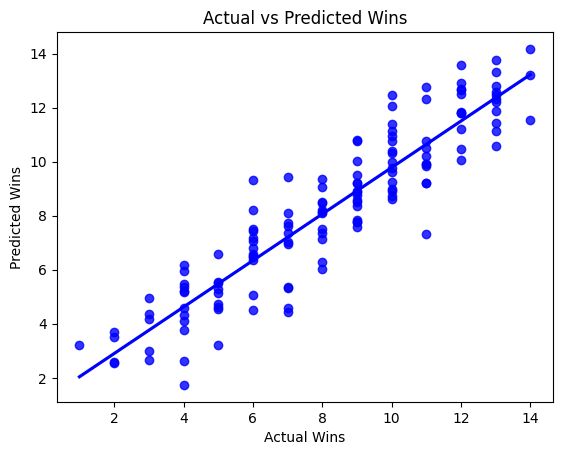

In [10]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

# Step 10: Visualize the results
sns.regplot(x=y_test, y=y_pred, ci=None, color="b")
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual vs Predicted Wins')
plt.show()

Correlation Matrix: Turnover Pct vs Penalties vs Point Differential vs Wins
              turnover_pct  penalties  points_diff      wins
turnover_pct      1.000000   0.043965    -0.508517 -0.514488
penalties         0.043965   1.000000    -0.098427 -0.116042
points_diff      -0.508517  -0.098427     1.000000  0.908735
wins             -0.514488  -0.116042     0.908735  1.000000


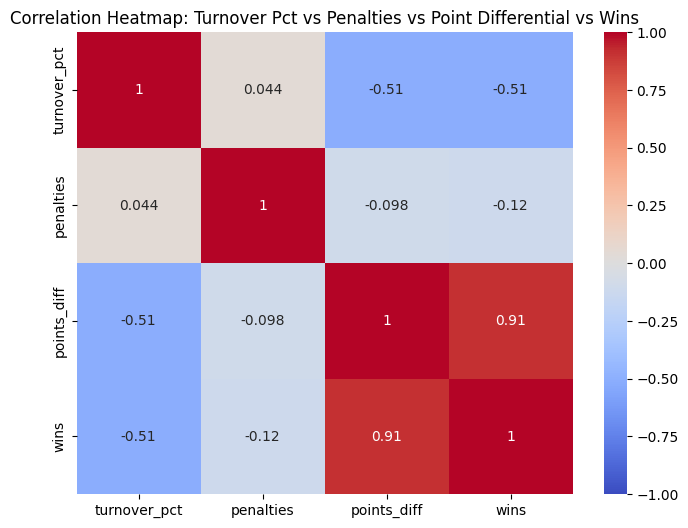

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

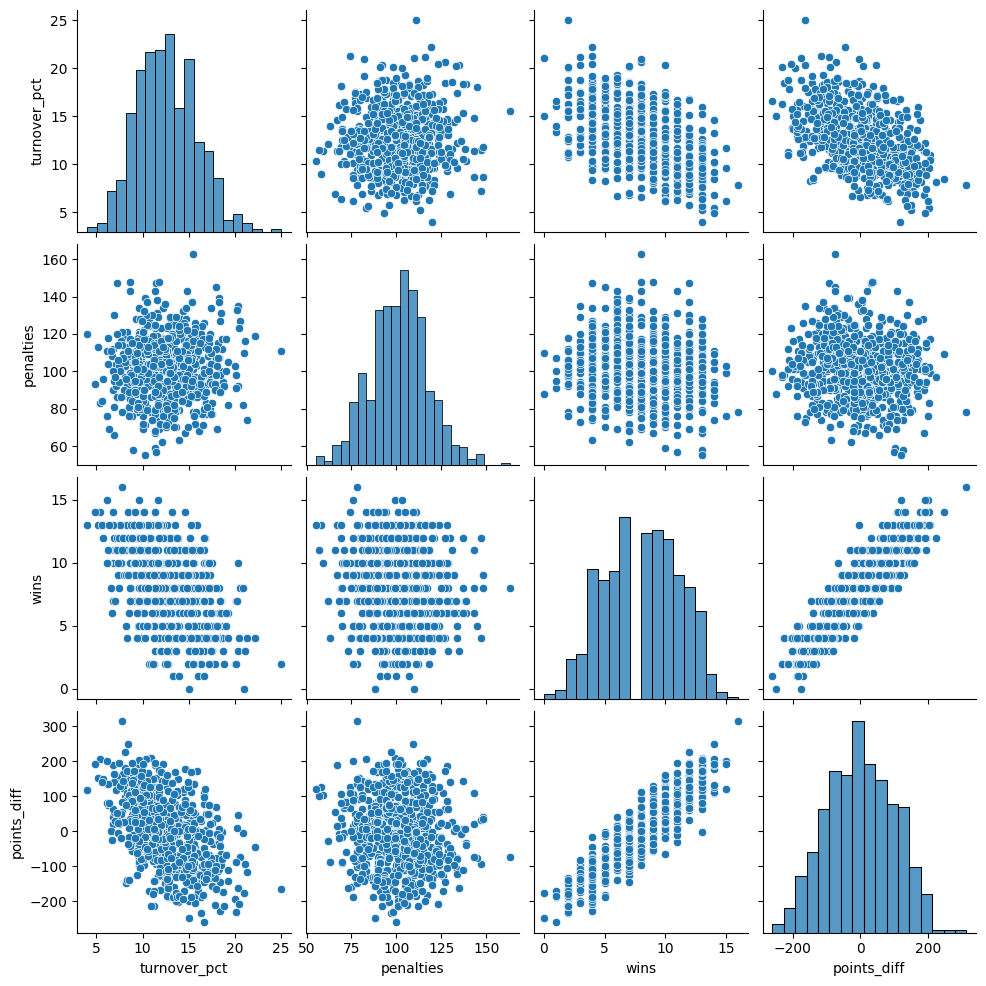

In [11]:
# Turnover % and Penalty Impact on Wins and Point Differential
# Perform correlation analysis
correlation_matrix1 = stats_name[['turnover_pct', 'penalties', 'points_diff', 'wins']].corr()

# Print correlation matrix
print("Correlation Matrix: Turnover Pct vs Penalties vs Point Differential vs Wins")
print(correlation_matrix1)

# Visualize the correlation matrix using a heatmap and scatter plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Turnover Pct vs Penalties vs Point Differential vs Wins')
plt.show()

# Scatter plot
sns.pairplot(stats_name[['turnover_pct', 'penalties', 'wins', 'points_diff']])
plt.show()

In [12]:
# Effect of Turnover % and Penalties Together on Wins and Point Differential
# Turnovers + Penalties on Wins
X = stats_name[['turnover_pct', 'penalties']]
y = stats_name['wins']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

# Turnovers + Penalties on Point Diff
X = stats_name[['turnovers', 'penalties']]
y = stats_name['points_diff']
X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     125.9
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           3.93e-47
Time:                        20:20:29   Log-Likelihood:                -1604.5
No. Observations:                 672   AIC:                             3215.
Df Residuals:                     669   BIC:                             3229.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           16.0554      0.748     21.473   

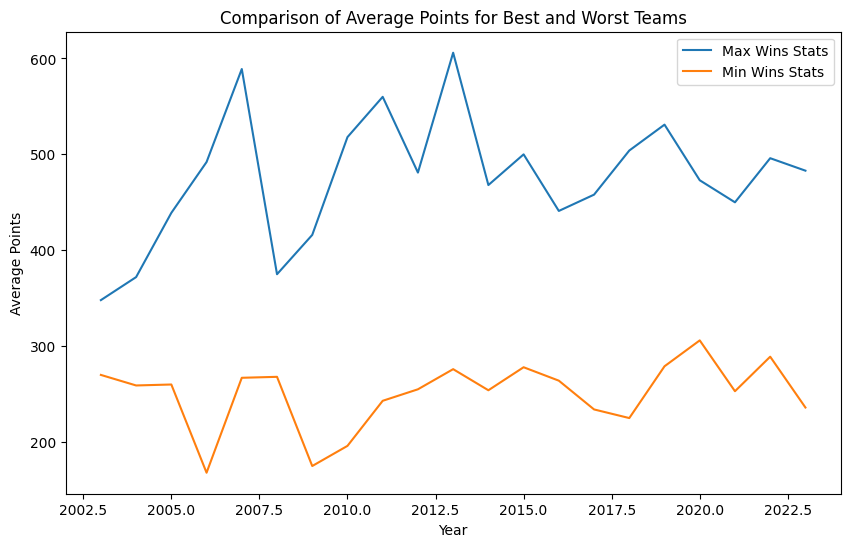

In [13]:
# Year by Year Comparison of Best Team vs Worst Team


# Group by year and find the team with the maximum wins
max_wins_teams = stats_name.loc[stats_name.groupby('year')['wins'].idxmax()]

# Group by year and find the team with the minimum wins
min_wins_teams = stats_name.loc[stats_name.groupby('year')['wins'].idxmin()]

# Calculate average stats for teams with the most wins
avg_stats_max = max_wins_teams.groupby('year').mean(numeric_only=True)

# Calculate average stats for teams with the least wins
avg_stats_min = min_wins_teams.groupby('year').mean(numeric_only=True)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Max Wins Stats': avg_stats_max['points'], 
                              'Min Wins Stats': avg_stats_min['points']})

# You can add more stats to the comparison DataFrame

# Plot the comparison
comparison_df.plot(kind='line', figsize=(10, 6))
plt.title('Comparison of Average Points for Best and Worst Teams')
plt.xlabel('Year')
plt.ylabel('Average Points')
plt.show()

## Share
* **Correlation Analysis Interpretation:**
    * Points is strongly correlated with both total yards and wins, indicating that scoring more points is closely associated with gaining more yards and achieving more wins.
    * Total yards and points have the highest correlation coefficient **(0.837)**, which is the strongest relationship among the three pairs, suggesting that the amount of total yards gained is a strong indicator of the points scored.
    * Total yards and wins have a moderate positive correlation **(0.548)**, suggesting that while there is a positive relationship between total yards and wins, it is not as strong as the relationship between points and wins.
    * A negative correlation of **(-0.51)** suggests that as the turnover percentage increases, the point differential tends to decrease.
    * A negative correlation of **(-0.51)** between turnover percentage and wins indicates that teams with a higher turnover percentage tend to win fewer games.
    * Penalties have a much weaker relationship with point differential **(-0.10)** and wins **(-0.12)**, indicating that while penalties can be harmful, they are not as critical as turnovers in determining a team's success.
    * A very strong positive correlation of **0.91** indicates that point differential is highly predictive of wins.
* **Regression Analysis Interpretation**
    * A Mean Squared Error (MSE) of approximately **1.58** suggests that, on average, the squared difference between the predicted number of wins and the actual number of wins is around 1.58.
    * An R-squared value of **0.8464** means that approximately 84.64% of the variance in the number of wins is explained by the features in this model.
* **Multiple Linear Regression Interpretation**
* Wins
    * About **27.3%** of the variability in the number of wins can be explained by the turnover percentage and penalties variables.
* Point Differential
    * About **24.9%** of the variability in point differential can be explained by turnover percentage and penalties.
* For each 1% increase in turnover percentage, the number of wins is expected to decrease by about **0.49**, holding penalties constant. For each additional penalty, the number of wins is expected to decrease by about **0.018**, holding turnover percentage constant.
* For each additional turnover, the point differential is expected to decrease by about **7.49** points, holding penalties constant. For each additional penalty, the point differential is expected to decrease by about **0.35** points, holding turnovers constant.
    * It should be noted that this effect is not statistically significant at the conventional 5% level **(p = 0.096)**, showing that penalties might not have a large impact on point differential in this model.

## Final Insights and Recommendations
* **Correlation Insights**
    * **Points** is the most crucial factor since it has strong correlations with both total yards and wins. Teams that score more points are highly likely to win.
    * **Total yards** also plays a significant role, but its direct correlation with wins is weaker compared to its correlation with points.
    * **Point differential** is strongly correlated with wins, reinforcing the idea that outscoring opponents is the most direct path to victory.
    * **Turnovers** have a meaningful negative impact on both point differential and wins.
    * **Penalties** have a much weaker relationship with point differential and wins, indicating that while penalties can be harmful, they are not as critical as turnovers in determining a team's success.
* **Regression Model Insights**
    * Rushing attempts and passing attempts were significant predictors of wins based on the factors included in the model.
    * This machine learning model could've been improved with more precise factors, as some were less significant than others when predicting the amount of wins.
* **Multiple Linear Regression Model Insights**
    * Both models consistently show that **turnovers** have a significant negative impact on both wins and point differential.
    * While **penalties** are undesirable, they might not be as impactful as turnovers in determining a team’s success.